In [ ]:
from datetime import datetime, date
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
import sklearn.model_selection
import pandas as pd
from pandas_datareader import data
import yfinance as yfin
yfin.pdr_override()

AttributeError: module 'yfinance' has no attribute 'pdr_override'

In [2]:
start = datetime(2022, 1, 5)
end = datetime.today()
df_aapl = yfin.download("AAPL", start, end)
df_fb = yfin.download("META", start, end)
df_gold = yfin.download("GLD", start, end)
df_aapl.tail(5)

C:\Users\WebEngineer.E17\AppData\Local\Temp\ipykernel_15584\1024680635.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_aapl = yfin.download("AAPL", start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\WebEngineer.E17\AppData\Local\Temp\ipykernel_15584\1024680635.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_fb = yfin.download("META", start, end)
[*********************100%***********************]  1 of 1 completed
C:\Users\WebEngineer.E17\AppData\Local\Temp\ipykernel_15584\1024680635.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_gold = yfin.download("GLD", start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-10-30,271.399994,274.140015,268.480011,271.989990,69886500
2025-10-31,270.369995,277.320007,269.160004,276.989990,86167100
2025-11-03,269.049988,270.850006,266.250000,270.420013,50194600
2025-11-04,270.040009,271.489990,267.619995,268.329987,49274800
2025-11-05,270.140015,271.700012,266.929993,268.589996,40379287


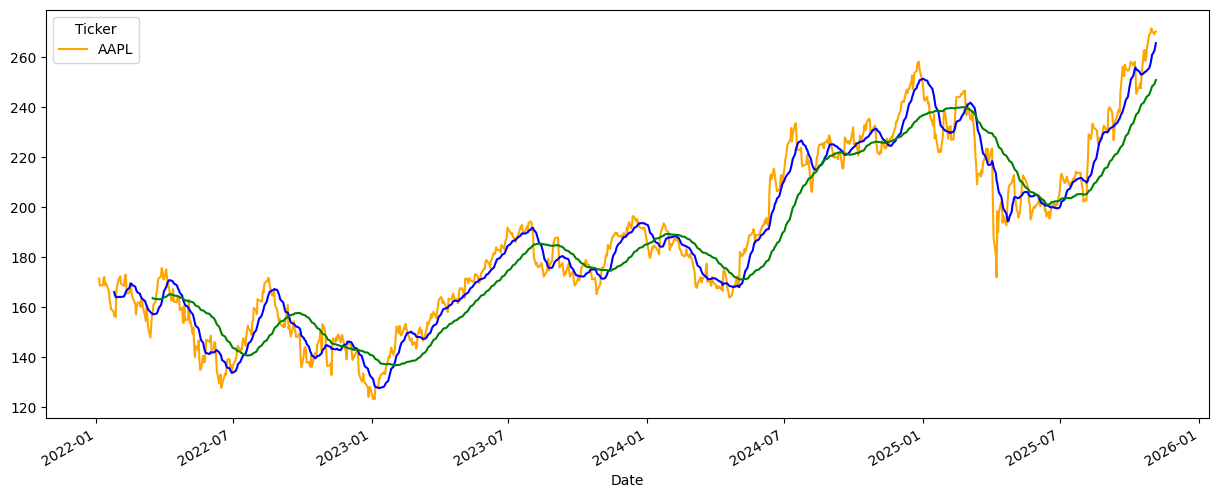

In [3]:
# 統計学 Simple Moving Average
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()
df_aapl['Close'].plot(figsize=(15, 6), color='orange')
df_aapl['SMA'].plot(figsize=(15, 6), color='blue')
df_aapl['SMA50'].plot(figsize=(15, 6), color='green')
plt.show()

In [4]:
df_aapl['change'] = (((df_aapl['Close'] - df_aapl['Open']) / df_aapl['Open']) * 100)
df_fb['change'] = (((df_fb['Close'] - df_fb['Open']) / df_fb['Open']) * 100)
df_gold['change'] = (((df_gold['Close'] - df_gold['Open']) / df_gold['Open']) * 100)
df_aapl.tail(5).round(2)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2025-10-30,271.40,274.14,268.48,271.99,69886500,259.23,247.34,-0.22
2025-10-31,270.37,277.32,269.16,276.99,86167100,260.86,248.25,-2.39
2025-11-03,269.05,270.85,266.25,270.42,50194600,262.38,249.07,-0.51
2025-11-04,270.04,271.49,267.62,268.33,49274800,263.85,249.93,0.64
2025-11-05,270.14,271.70,266.93,268.59,40379287,265.48,250.75,0.58


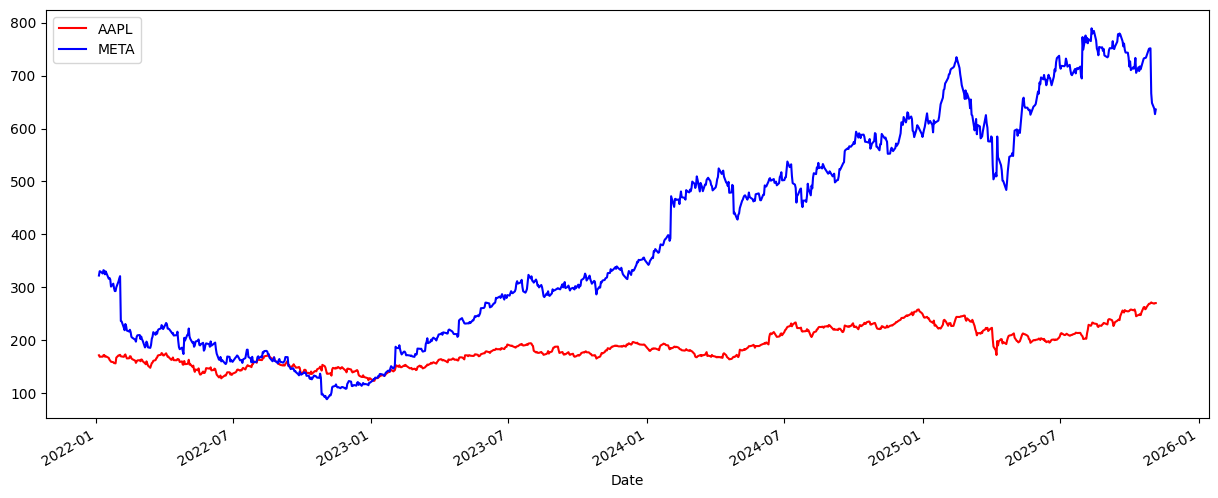

In [7]:
import matplotlib.pyplot as plt

# 1. FigureとAxesを明示的に作成する
fig, ax = plt.subplots(figsize=(15, 6))

# 2. 各プロットに 'ax' 引数で同じAxesを渡す
df_aapl['Close'].plot(ax=ax, color='red', label='AAPL Close')
df_fb['Close'].plot(ax=ax, color='blue', label='META Close')

# 3. 凡例を表示して、どの線がどの銘柄かを示す
ax.legend() 

# 4. グラフを表示する
plt.show()

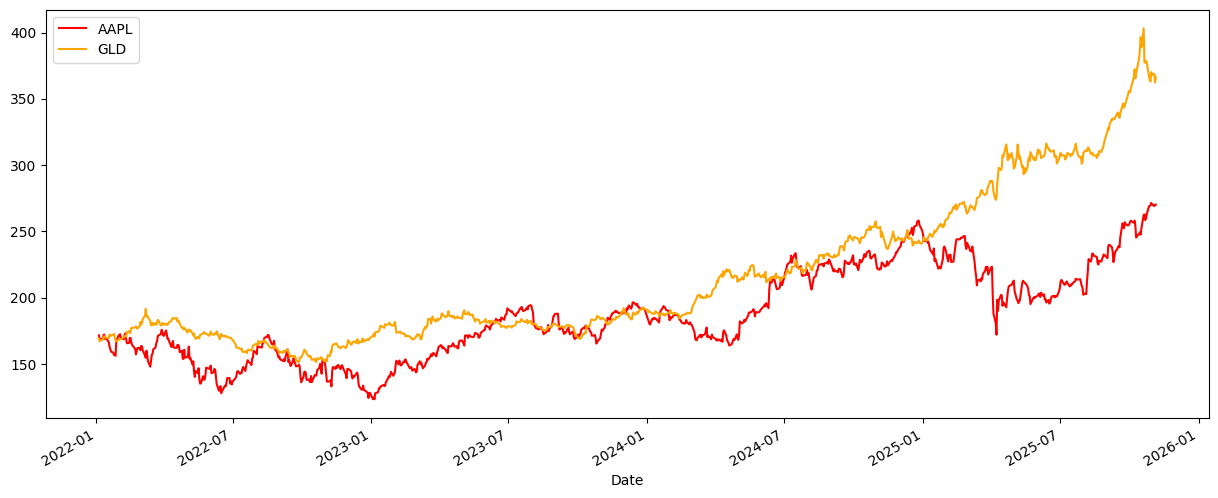

In [8]:
import matplotlib.pyplot as plt

# 1. FigureとAxes（グラフ描画領域）を明示的に作成する
fig, ax = plt.subplots(figsize=(15, 6))

# 2. Appleの終値（Close）をAxes 'ax' にプロットする
#    凡例用に 'label' を設定
df_aapl['Close'].plot(ax=ax, color='red', label='AAPL Close')

# 3. 金ETFの終値（Close）を同じ Axes 'ax' にプロットする
df_gold['Close'].plot(ax=ax, color='orange', label='GLD Close')

# 4. 凡例（Legend）を表示して、線がどちらの銘柄か分かるようにする
ax.legend() 

# 5. グラフを表示する
plt.show()

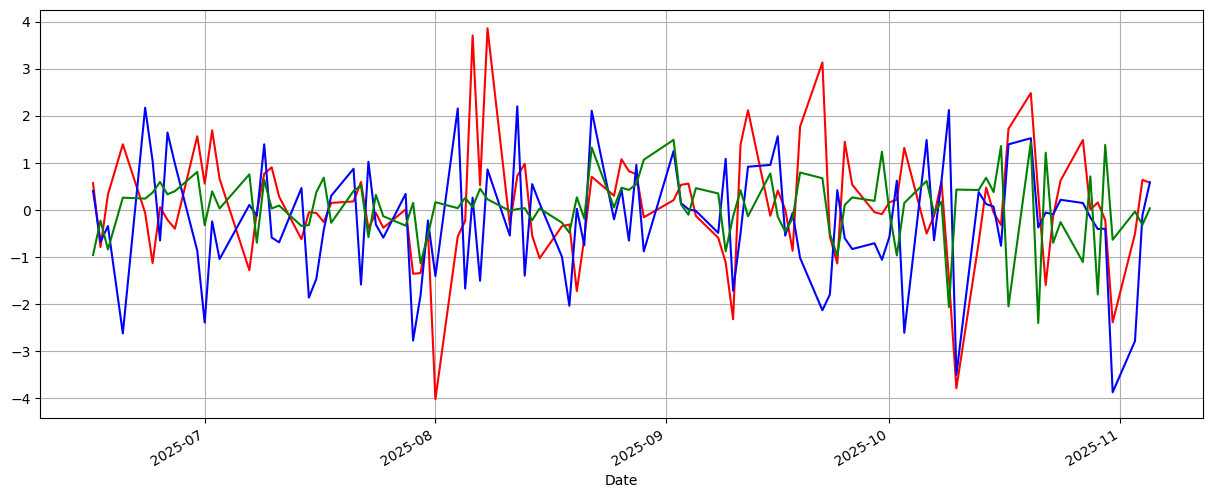

In [9]:
# データマイニング
df_aapl['change'].tail(100).plot(grid=True, figsize=(15, 6), color="red")
df_fb['change'].tail(100).plot(grid=True, figsize=(15, 6), color="blue")
df_gold['change'].tail(100).plot(grid=True, figsize=(15, 6), color="green")
plt.show()

In [10]:
# 機械学習(マシンラーニング)
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(35)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600,235.331430,223.161670,-0.870941,271.399994
2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300,236.285715,223.828286,1.770097,270.369995
2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400,238.168571,224.731473,3.133300,269.049988
2025-09-23,254.429993,257.339996,253.580002,255.880005,60275200,239.308571,225.652403,-0.566677,270.040009
2025-09-24,252.309998,255.740005,251.039993,255.220001,42303700,240.203571,226.521144,-1.140194,270.140015
2025-09-25,256.869995,257.170013,251.710007,253.210007,55202100,241.430713,227.460109,1.445436,NaN
2025-09-26,255.460007,257.600006,253.779999,254.100006,46076300,242.686428,228.373670,0.535223,NaN
2025-09-29,254.429993,255.000000,253.009995,254.559998,40127700,244.120712,229.243458,-0.051070,NaN


In [12]:
# 機械学習(マシンラーニング)
# ラベルを行列にしたデータを入手
X = np.array(df_aapl.drop(['label', 'SMA', 'SMA50'], axis=1))
# 使うデータのスケールが同じなら精度を入れると結果が良くなる
# 平均を引いて、標準偏差で割ってスケーリングする
X = sklearn.preprocessing.scale(X)

# 予測に使う過去30日間のデータ
predict_data = X[-30:]
# 過去30日を取り除いた入力データー
X = X[:-30]

Y = np.array(df_aapl['label'])
# 過去30日を取り除いた正解ラベル
Y = Y[:-30]

# 機械学習データーを80% 検証データーを20%に分ける
# 第一引数に入力データー、第二引数に正解ラベルの配列
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)

# 機械学習を用いて予測する
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# 検証データーを用いて検証してみる
accuracy = model.score(X_test, y_test)
print(accuracy)

# 予測する
predicted_data = model.predict(predict_data)
predicted_data

0.7742551515914281


array([250.50033615, 256.75462557, 252.51522821, 253.80319093,
       259.68134952, 253.56901105, 255.12959432, 255.80312064,
       256.03357274, 256.68278476, 255.3030358 , 250.89663695,
       245.9542706 , 245.94449346, 250.61028941, 245.46639174,
       248.9947399 , 256.220148  , 264.94443873, 255.5969808 ,
       258.11337134, 259.46144922, 264.12262441, 267.64887336,
       266.31123099, 266.80905539, 269.48857654, 263.88812631,
       267.82613078, 267.16308569])

In [13]:
df_aapl['Predict'] = np.nan
df_aapl.tail(35)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label,Predict
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600,235.331430,223.161670,-0.870941,271.399994,NaN
2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300,236.285715,223.828286,1.770097,270.369995,NaN
2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400,238.168571,224.731473,3.133300,269.049988,NaN
2025-09-23,254.429993,257.339996,253.580002,255.880005,60275200,239.308571,225.652403,-0.566677,270.040009,NaN
2025-09-24,252.309998,255.740005,251.039993,255.220001,42303700,240.203571,226.521144,-1.140194,270.140015,NaN
2025-09-25,256.869995,257.170013,251.710007,253.210007,55202100,241.430713,227.460109,1.445436,NaN,NaN
2025-09-26,255.460007,257.600006,253.779999,254.100006,46076300,242.686428,228.373670,0.535223,NaN,NaN
2025-09-29,254.429993,255.000000,253.009995,254.559998,40127700,244.120712,229.243458,-0.051070,NaN,NaN


In [14]:
# 最後の日付
last_date = df_aapl.iloc[-1].name
one_day = 86400
next_unix = last_date.timestamp() + one_day

for data in predicted_data:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date] = np.append([np.nan] * (len(df_aapl.columns) - 1), data)

df_aapl.tail(35)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label,Predict
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2025-10-30 00:00:00,271.399994,274.140015,268.480011,271.989990,69886500.0,259.234285,247.338999,-0.216918,NaN,NaN
2025-10-31 00:00:00,270.369995,277.320007,269.160004,276.989990,86167100.0,260.856427,248.248399,-2.389976,NaN,NaN
2025-11-03 00:00:00,269.049988,270.850006,266.250000,270.420013,50194600.0,262.376426,249.074199,-0.506629,NaN,NaN
2025-11-04 00:00:00,270.040009,271.489990,267.619995,268.329987,49274800.0,263.854998,249.931799,0.637283,NaN,NaN
2025-11-05 00:00:00,270.140015,271.700012,266.929993,268.589996,40379287.0,265.475713,250.748400,0.577095,NaN,NaN
2025-11-06 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.500336
2025-11-07 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.754626
2025-11-08 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.515228


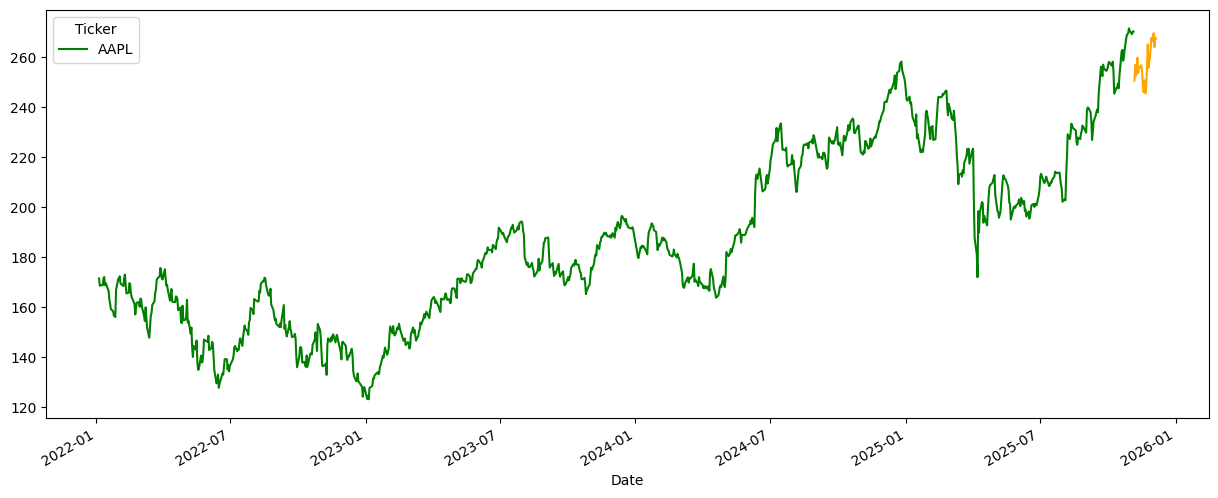

In [15]:
df_aapl['Close'].plot(figsize=(15, 6), color="green")
df_aapl['Predict'].plot(figsize=(15, 6), color="orange")
plt.show()